<a href="https://colab.research.google.com/github/hudaquresh/DL_Course/blob/main/GradientDescentInAction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


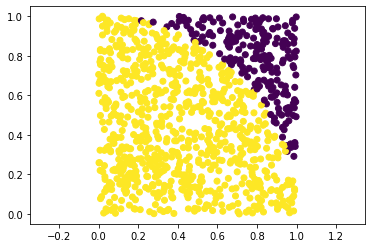

In [ ]:
x = torch.rand([1000, 2])
x_in_circle = (x**2).sum(1) < 1 

def classify(x, weights, bias): 
  return (x * weights[None, :]).sum(dim=1) + bias > 0 

def accuracy(pred_label): 
  return (pred_label == x_in_circle).float().mean()

def show(y): 
  scatter(*x.numpy().T, c=y.detach().numpy())
  axis('equal')

def predict(x, weights, bias): 
  logit = (x * weights[None, :]).sum(dim=1) + bias 
  return 1/(1 + (-logit).exp())

def loss(prediction): 
  return ( -x_in_circle.float()       * prediction.log() + 
           -(1-x_in_circle.float())   * (1 - prediction).log()). mean()
show(x_in_circle)

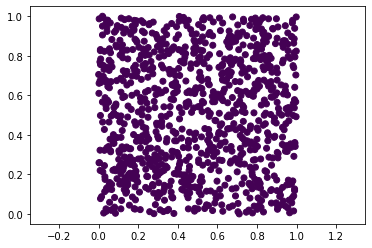

In [ ]:
weights = torch.as_tensor([-1, 1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)

In [ ]:
import torch.utils.tensorboard as tb
%reload_ext tensorboard
import tempfile
log_dir = tempfile.mkdtemp()
%tensorboard --logdir {log_dir} --reload_interval 1 
print(log_dir)

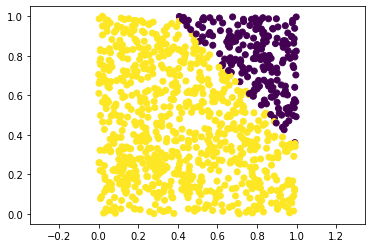

In [ ]:
logger = tb.SummaryWriter(log_dir+'/linear1')

weights = torch.as_tensor([-1, -1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)
label = x_in_circle.float()

for iteration in range(5000): 
  p_y = predict(x, weights, bias)
  pred_y = classify(x, weights, bias)
  
  l = loss(p_y)

  logger.add_scalar('loss', 1, global_step=iteration)
  logger.add_scalar('accuracy', accuracy(pred_y), global_step=iteration)

  if iteration % 10 == 0: 
    fig = figure()
    show(pred_y)
    logger.add_figure('pred_y', fig, global_step=iteration)
    del fig

  # Gradient computation 
  gradient_l_f = p_y - label.float()
  gradient_w = (gradient_l_f[:, None]*x).mean(0)
  gradient_b = (gradient_l_f).mean(0)

  # Gradient update
  weights -= 0.5 * gradient_w
  bias    -= 0.5 * gradient_b

show(pred_y)